In [115]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [116]:
df=pd.read_csv('Train_Titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148


In [117]:
df = df.drop(["PassengerId","Name","Ticket"], axis =1)
df

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Cabin
0,0,3,male,22.0,1,0,7.2500,NaN
1,1,1,female,38.0,1,0,71.2833,C85
2,1,3,female,26.0,0,0,7.9250,NaN
3,1,1,female,35.0,1,0,53.1000,C123
4,0,3,male,35.0,0,0,8.0500,NaN
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN
887,1,1,female,19.0,0,0,30.0000,B42
888,0,3,female,NaN,1,2,23.4500,NaN
889,1,1,male,26.0,0,0,30.0000,C148


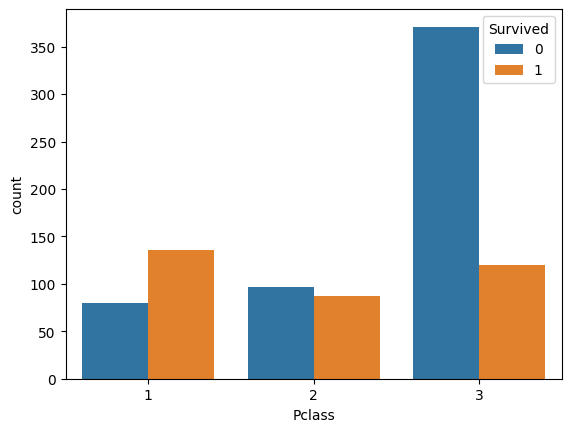

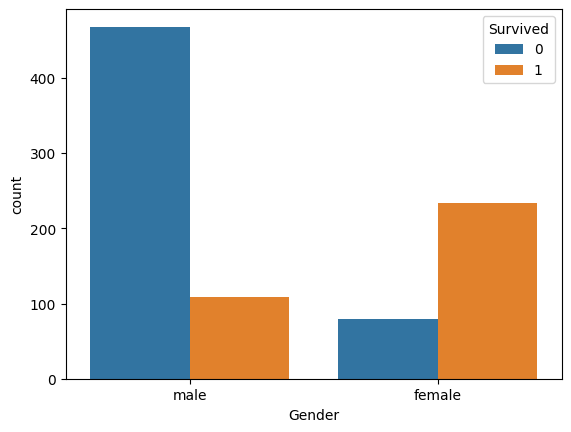

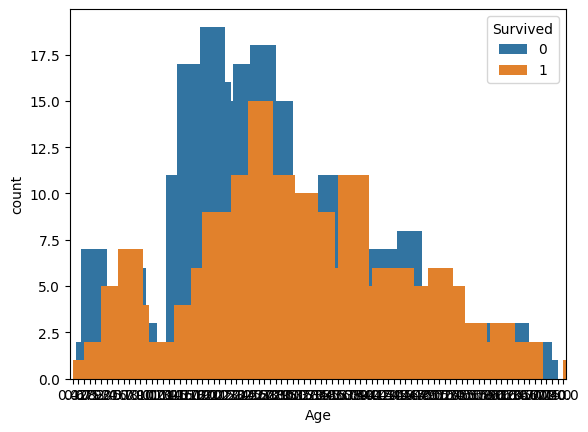

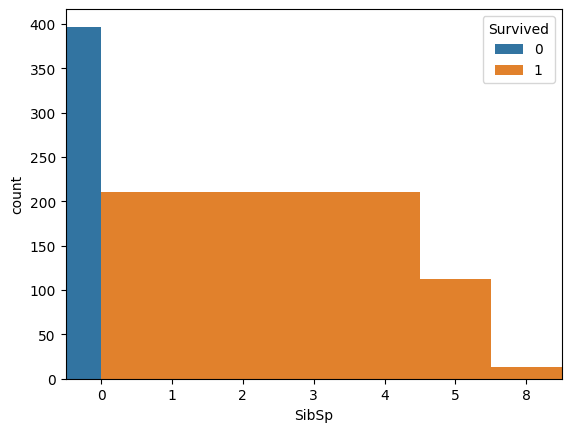

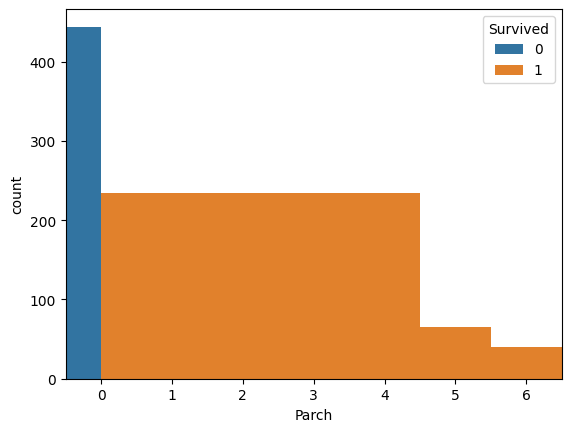

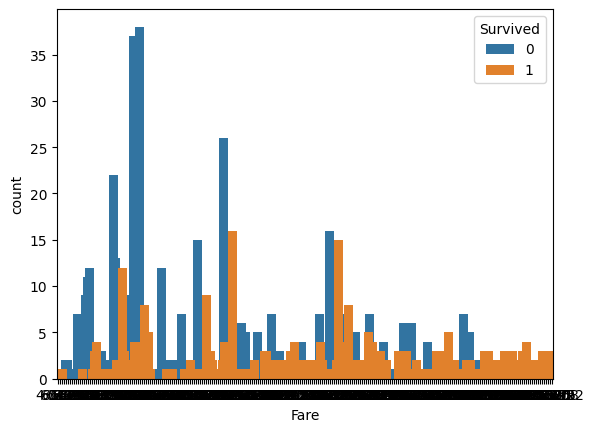

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [118]:
sns.countplot(data= df, x= "Pclass", hue = "Survived")
plt.show()

sns.countplot(data= df, x= "Gender", hue = "Survived")
plt.show()

sns.countplot(data= df, x= "Age", hue = "Survived",width=9)
plt.show()

sns.countplot(data= df, x= "SibSp", hue = "Survived",width=9)
plt.show()

sns.countplot(data= df, x= "Parch", hue = "Survived",width=9)
plt.show()

sns.countplot(data= df, x= "Fare", hue = "Survived",width=9)
plt.show()

df = df.drop(["Cabin"], axis =1)
df



In [119]:
le  = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])

print(df)

df["Age"] = df["Age"].fillna(value= df["Age"].mean())

print(df)

     Survived  Pclass  Gender   Age  SibSp  Parch     Fare
0           0       3       1  22.0      1      0   7.2500
1           1       1       0  38.0      1      0  71.2833
2           1       3       0  26.0      0      0   7.9250
3           1       1       0  35.0      1      0  53.1000
4           0       3       1  35.0      0      0   8.0500
..        ...     ...     ...   ...    ...    ...      ...
886         0       2       1  27.0      0      0  13.0000
887         1       1       0  19.0      0      0  30.0000
888         0       3       0   NaN      1      2  23.4500
889         1       1       1  26.0      0      0  30.0000
890         0       3       1  32.0      0      0   7.7500

[891 rows x 7 columns]
     Survived  Pclass  Gender        Age  SibSp  Parch     Fare
0           0       3       1  22.000000      1      0   7.2500
1           1       1       0  38.000000      1      0  71.2833
2           1       3       0  26.000000      0      0   7.9250
3           

In [120]:
X=df.drop("Survived",axis=1)
y=df['Survived']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
model=LogisticRegression()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)

print(y_predict)

# print(y_test)

print("accuracy score is:::::")

print(accuracy_score(y_predict,y_test))



[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1]
accuracy score is:::::
0.770949720670391
